# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10170155/salary_data.csv", encoding = "ISO-8859-1")
df.head()

,SoNamKinhNghiem,Luong,NganhNghe
0,7,26.0,KeToan
1,4,13.8,KeToan
2,8,21.5,KeToan
3,9,24.0,KeToan
4,1,7.8,KeToan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SoNamKinhNghiem  1426 non-null   int64  
 1   Luong            1426 non-null   float64
 2   NganhNghe        1426 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [4]:
df.describe()

,SoNamKinhNghiem,Luong
count,1426.000000,1426.000000
mean,4.894109,16.316550
std,3.075541,6.548031
min,0.000000,5.400000
25%,2.000000,10.900000
50%,5.000000,16.200000
75%,7.000000,21.300000
max,10.000000,70.000000


# 2. Trực quan hoá dữ liệu

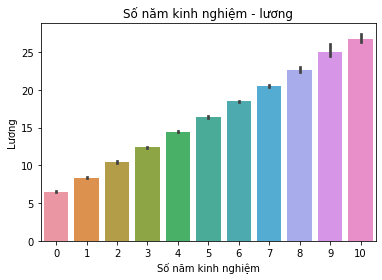

In [5]:
sns.barplot(x = "SoNamKinhNghiem", y = "Luong", data = df)
plt.title("Số năm kinh nghiệm - lương")
plt.xlabel("Số năm kinh nghiệm")
plt.ylabel("Lương")
plt.show()

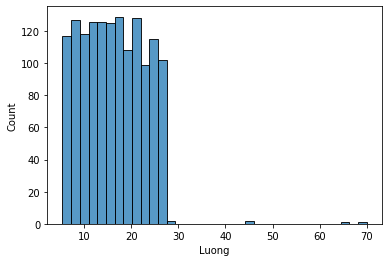

In [6]:
# Vẽ biểu đồ histogram
sns.histplot(df.Luong)
plt.show()

In [7]:
# Tách dữ liệu ra các ngành nghề riêng biệt
df_ketoan = df[df.NganhNghe == "KeToan"]
df_hcns = df[df.NganhNghe == "HCNS"]
df_sale = df[df.NganhNghe == "Sale"]

In [8]:
# Tính lương trung bình theo ngành
ltb_nganh = df.groupby(["NganhNghe"])["Luong"].mean()
ltb_nganh

NganhNghe
HCNS      16.556537
KeToan    15.645975
Sale      16.782216
Name: Luong, dtype: float64

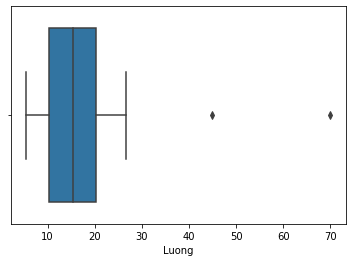

In [9]:
# Biểu đồ phân số lương của nhân viên kế toán
sns.boxplot(x = "Luong", data = df_ketoan)
plt.show()

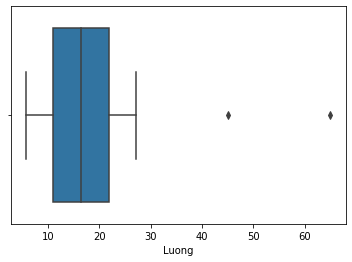

In [10]:
# Biểu đồ phân bố lương của nhân viên HCNS
sns.boxplot(x = "Luong", data = df_hcns)
plt.show()

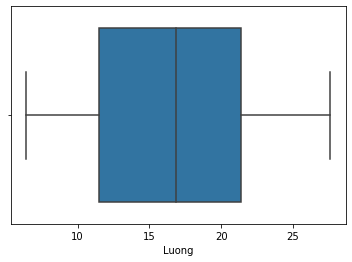

In [11]:
# Biểu đồ phân bố lương của nhân viên Sale
sns.boxplot(x = "Luong", data = df_sale)
plt.show()

# 3. Xây dựng mô hình dự đoán tiền lương theo số năm kinh nghiệm

In [12]:
x = df.SoNamKinhNghiem.values.reshape(-1, 1)
y = df.Luong.values.reshape(-1, 1)

# Chia bộ dữ liệu làm 2 tập train và test theo tỷ lệ 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Khai báo mô hình hồi quy tuyến tính
regressor = LinearRegression()

# Huấn luyện mô hình
regressor.fit(x_train, y_train)

print("Mô hình hồi quy sẽ có dạng: Lương = a + b * Số năm kinh nghiệm \n với các hệ số a và b lần lượt là: ")
print(regressor.intercept_)
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: Lương = a + b * Số năm kinh nghiệm 
 với các hệ số a và b lần lượt là: 
[6.35592115]
[[2.03289729]]


# 4. Đánh giá mô hình

In [15]:
# Dự đoán trên số năm kinh nghiệm của bộ dữ liệu test
y_pred = regressor.predict(x_test)

# Khai báo các thư viện metrics và r2_score
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, regressor.predict(x_train))
print("R2 trên tập huấn luyện của model là: " + str(r2_train))

r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là: " + str(r2_test))

df1 = pd.DataFrame({"Số năm kinh nghiệm": x_test.flatten(),
                   "Lương thực tế": y_test.flatten(),
                   "Lương dự báo": y_pred.flatten()})
print("\n Đánh giá năng lực dự báo trung bình trên tập test")
print("Sai số dự báo trung bình: ", metrics.mean_absolute_error(y_test, y_pred))

R2 trên tập huấn luyện của model là: 0.9318331044271062
R2 trên tập kiểm tra của model là: 0.8762196686203844

 Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình:  0.5566819767125358


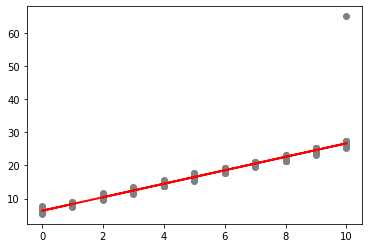

In [16]:
plt.scatter(x_test, y_test, color = "gray")
plt.plot(x_test, y_pred, color = "red", linewidth = 2)
plt.show()

# 5. Lưu trữ mô hình vào máy tính

In [17]:
# Khai báo thư viện giúp lưu trữ mô hình
import pickle
filename = "model.sav"
pickle.dump(regressor, open(filename, "wb"))

# 6. Sử dụng mô hình sau khi đã lưu

In [18]:
# Sử dụng mô hình
load_model = pickle.load(open(filename, "rb"))
x = [[1], [2], [4]]
y_pred = load_model.predict(x)
y_pred

array([[ 8.38881844],
       [10.42171574],
       [14.48751032]])